In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [15]:
# Шаг 1: Загрузка данных
data = pd.read_csv('abalone.csv')

In [16]:
# Шаг 2: Преобразование признака Sex в числовой
sex_map = {'M': 1, 'F': -1, 'I': 0}
data['Sex'] = data['Sex'].replace(sex_map)

In [17]:
# Шаг 3: Разделение данных на признаки и целевую переменную
X = data.drop('Rings', axis=1)
y = data['Rings']

In [18]:
# Шаг 4: Обучение случайного леса
r2_scores = []
min_trees_for_quality = None
for n_estimators in range(1, 51):
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=1)
    kf = KFold(n_splits=5, shuffle=True, random_state=1)
    scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    mean_r2_score = scores.mean()
    r2_scores.append(mean_r2_score)

    if mean_r2_score > 0.52 and (min_trees_for_quality is None or n_estimators < min_trees_for_quality):
        min_trees_for_quality = n_estimators

In [19]:
# Шаг 5: Определение минимального количества деревьев
print(f'Минимальное количество деревьев с качеством > 0.52: {min_trees_for_quality}')

Минимальное количество деревьев с качеством > 0.52: 21


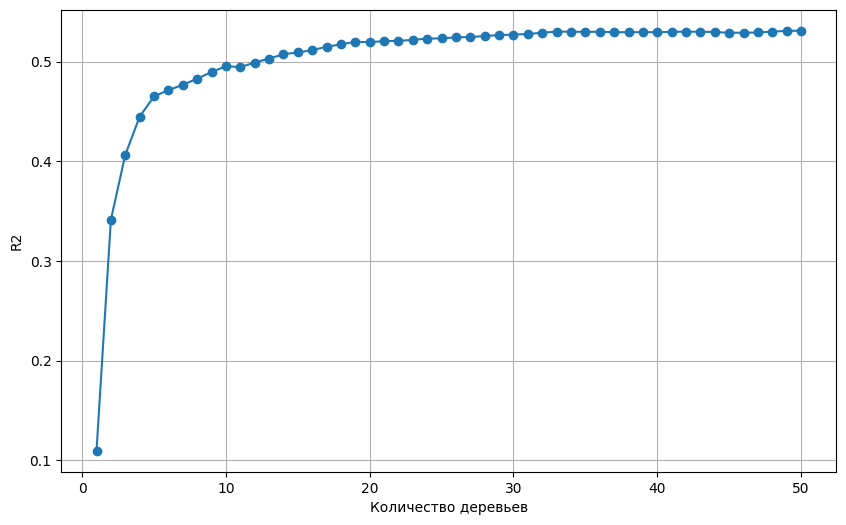

In [20]:
# Шаг 6: Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), r2_scores, marker='o')
plt.xlabel('Количество деревьев')
plt.ylabel('R2')
plt.grid(True)
plt.show()